In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('Friday-16-02-2018_TrafficForML_CICFlowMeter.csv')
df2 = df1.groupby(['Timestamp'])['Flow Duration'].count()
df2 = pd.DataFrame(df2).reset_index()
df2.columns=['Timestamp','BiFlowsCount']
df = df1.merge(df2, left_on='Timestamp', right_on='Timestamp')
df = df.sort_values('Timestamp')
#df.head()
df

C:\Users\kdagi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,BiFlowsCount
140234,0,0,16/02/2018 01:00:32,112640723,3,0,0,0,0,0,...,0,0,0,0,5.63e+07,101.116,56300000,56300000,Benign,1
140233,22,6,16/02/2018 01:01:42,2146470,14,12,1335,2273,744,0,...,0,0,0,0,0,0,0,0,Benign,1
140236,0,0,16/02/2018 01:03:21,112640737,3,0,0,0,0,0,...,0,0,0,0,5.63e+07,17.6777,56300000,56300000,Benign,1
140264,67,17,16/02/2018 01:03:50,721,1,1,300,329,300,300,...,0,0,0,0,0,0,0,0,Benign,1
140238,0,0,16/02/2018 01:06:10,112640647,3,0,0,0,0,0,...,0,0,0,0,5.63e+07,58.6899,56300000,56300000,Benign,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140229,0,0,16/02/2018 12:54:54,112640695,3,0,0,0,0,0,...,0,0,0,0,5.63e+07,26.163,56300000,56300000,Benign,1
140232,0,0,16/02/2018 12:57:43,112640664,3,0,0,0,0,0,...,0,0,0,0,5.63e+07,28.2843,56300000,56300000,Benign,1
140230,22,6,16/02/2018 12:58:13,10162102,9,7,1063,1297,744,0,...,989739,0,989739,989739,9.17234e+06,0,9172344,9172344,Benign,1
140231,42453,6,16/02/2018 12:58:24,855,2,0,848,0,848,0,...,0,0,0,0,0,0,0,0,Benign,1


In [3]:
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [4]:
features = ['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'BiFlowsCount']

In [4]:
df["Label"].value_counts()

DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Label                            1
Name: Label, dtype: int64

In [5]:
X = df[features]
X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)

C:\Users\kdagi\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [6]:
def targetify(s):
    if s == 'Benign':
        return 0
    else:
        return 1

In [7]:
df['Target']=df['Label'].apply(targetify)

In [8]:
 y = df['Target']

In [9]:
X = X.fillna(0)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(838860, 80) (838860,)
(209715, 80) (209715,)


In [11]:
forest = ExtraTreesClassifier(n_estimators=100, random_state=2)

In [12]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=2, verbose=0,
                     warm_start=False)

In [13]:
importances = forest.feature_importances_

In [14]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [15]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 0: Dst Port (0.245877)
2. feature 8: Fwd Pkt Len Max (0.128295)
3. feature 11: Fwd Pkt Len Std (0.095339)
4. feature 41: Pkt Len Max (0.055706)
5. feature 55: Fwd Seg Size Avg (0.046944)
6. feature 10: Fwd Pkt Len Mean (0.045584)
7. feature 43: Pkt Len Std (0.044466)
8. feature 15: Bwd Pkt Len Std (0.033189)
9. feature 12: Bwd Pkt Len Max (0.032471)
10. feature 23: Fwd IAT Mean (0.026474)
11. feature 44: Pkt Len Var (0.024279)
12. feature 37: Bwd Header Len (0.023478)
13. feature 19: Flow IAT Std (0.017997)
14. feature 54: Pkt Size Avg (0.017668)
15. feature 25: Fwd IAT Max (0.017658)
16. feature 14: Bwd Pkt Len Mean (0.016174)
17. feature 68: Init Bwd Win Byts (0.015836)
18. feature 48: PSH Flag Cnt (0.015670)
19. feature 67: Init Fwd Win Byts (0.012174)
20. feature 6: TotLen Fwd Pkts (0.011107)
21. feature 49: ACK Flag Cnt (0.010719)
22. feature 42: Pkt Len Mean (0.009122)
23. feature 18: Flow IAT Mean (0.009074)
24. feature 56: Bwd Seg Size Avg (0.008104)

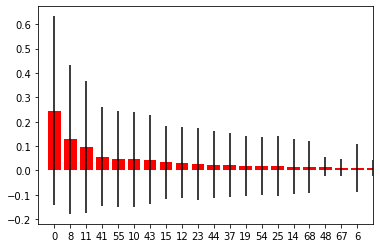

In [16]:
# Plot the top x feature importances of the forest
top_x = 20

plt.figure()
# plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(top_x), indices)
plt.xlim([-1, top_x])
plt.show()

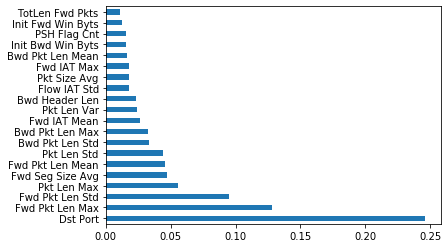

In [17]:
plt = pd.Series(forest.feature_importances_, index=X_train.columns).nlargest(top_x).plot(kind='barh')
fig = plt.get_figure()
fig.savefig('figure.jpg', bbox_inches = "tight")